#**Estatística no Python**
###Material para Execução e Testes

##**1. Orientações e Resumo:** 

In [0]:
# Falar sobre o Python
# Falar sobre a escolha das bibliotecas
# Justificar mostrando o foco de cada uma e sua utilidade
# Falar sobre o contexto da Matplotlib e Seaborn no uso gráfico
# Pincelar sobre o Pandas e sua utilidade principal com o DataFrame

# Sintetizar a sequência de execução que será mostrada no documento

##**2. Importação de Bibliotecas e Funções Implementadas:** 

####**2.1. Bibliotecas:** 

In [0]:
# Ferramentas Estatísticas
# Síntaxe de importação e Apelidos
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sp
import scipy.signal as ss
import statsmodels.graphics.gofplots as qq


#Ferramentas para Análise Gráfica
import seaborn as sns
import matplotlib.pyplot as plt

#Outros
import warnings
import random as rd
warnings.simplefilter(action='ignore', category=FutureWarning)

####**2.2. Resumo Estatístico Manual (Função):** 

In [0]:
# Implementação de um Resumo Estatístico Manual:
# Bibliotecas: Statistics, NumPy, SciPy.stats e pandas.Series()
def resumo_estatistico(distribuicao):
  dist = distribuicao
  dist_series = pd.Series(dist)
  try:
    moda = st.mode(dist) # Valores totalmente distintos, retorna erro
  except Exception as StatisticsError: # Tratamento do Erro
    moda = "-"

  media = st.mean(dist) 
  mediana = st.median(dist) 
  quartil_1 = np.quantile(dist, 0.25)
  quartil_2 = np.quantile(dist, 0.50)
  quartil_3 = np.quantile(dist, 0.75)
  minimo = np.min(dist)
  maximo = np.max(dist)
  amplitude = maximo - minimo
  dq = quartil_3 - quartil_1  
  dsv_padrao = st.stdev(dist)
  dsv_med_abs = dist_series.mad()
  variancia = st.variance(dist)
  coef_variacao = sp.variation(dist)
  

  # Gerando um Dicionário com as informações:
  dic_resumo = {'Informação': ['Média', 'Mediana', 'Moda', 'Mínimo', 'Máximo', 'Amplitude', 'Quartil 1', 'Quartil 2', 'Quartil 3', 'desvio interquartil','Desvio Padrão', 'Desvio Médio Absoluto', 'Variância','Coeficiente de Variação'],
          'Valor':[media, mediana, moda, minimo, maximo, amplitude, quartil_1, quartil_2, quartil_3, dq, dsv_padrao, dsv_med_abs, variancia, coef_variacao]}

  # Gerando um DataFrame a partir do Dicionário        
  df_resumo = pd.DataFrame(dic_resumo)
  return df_resumo


####**2.3. Tabela de Frequências(Função):**

In [0]:
def tabela_frequencia(distribuicao, resumo_est):
  dist = distribuicao
  resumo = resumo_est

  # Obtenção do valor de Amplitude Total dos Dados
  amplitude = resumo.iloc[5]['Valor']

  # Ordenação dos Dados
  dist_ord = np.sort(dist)

  # Cálculo do número estimado de intervalos(k)
  # OBS.: O valor pode ser calculado por outras definições, como a regra de Sturges, por exemplo
  k = np.sqrt(len(dist))
  n_intervalos = int(k)

  # Cálculo da Amplitude de Classe(h)
  h = amplitude/k

  # Menor valor da Série
  minimo = resumo.iloc[3]['Valor']

  # Maior valor da Série
  maximo = resumo.iloc[4]['Valor']

  # Discretização dos valores em k faixas, rotuladas pela lista criada anteriormente
  dist_intervalada = pd.cut(dist, n_intervalos)

  # Cálculo da Frequência Absoluta
  freq_abs = pd.value_counts(dist_intervalada, sort=False, ascending=False)
  val_freq_abs = freq_abs.get_values()

  #Cálculo da Frequência Relativa
  freq_rel = pd.value_counts(dist_intervalada, sort=False, ascending=False, normalize=True)
  val_freq_rel = freq_rel.get_values()

  # Soma Cumulativa das Frequências Absoluta e Relativa
  freq_abs_acum = np.cumsum(val_freq_abs)
  freq_rel_acum = np.cumsum(val_freq_rel)

  # Geração do Indexador dos Intervalos
  index_intervalo = range(1, n_intervalos+1 )

  # Construção do Dicionário de Frequências
  tab_freq = {'Classes': index_intervalo,
              'Intervalos': dist_intervalada.categories,
              'Frequência Absoluta': val_freq_abs,
              'Frequência Relativa': val_freq_rel,
              'Freq. Abs. Acumulada': freq_abs_acum,
              'Freq. Rel. Acumulada': freq_rel_acum}

  # Construção do DataFrame de Frequências
  df_tab_freq = pd.DataFrame(tab_freq)

  return df_tab_freq, n_intervalos, h,

####**2.4. *Tips* - Conversão dos Dados Qualitativos em Quantitativos (Função):**

In [0]:
def tips_numerico(base_tips):
  tips = base_tips
  #ARRUMAR
  # Selecionando todas as colunas com dados Categóricos/Qualitativos
  dados_qualit = tips.select_dtypes(include = 'category').columns.to_list()

  # Selecionando todas as colunas Categóricas que podem assumir dois tipos de valores
  dados_qualit_bin = [i for i in dados_qualit if not i == 'day']

  # Criando uma lista com as opções de cada categoria
  nomes_col_cat = []
  for i in dados_qualit:
    aux = tips[i].unique().to_list()
    nomes_col_cat.append(aux)

  # Adicionando ao DataFrame Tips as novas colunas com os valores convertidos em 0 ou 1
  # [Female, Male], [No, Yes], [Dinner, Lunch] = [0, 1]
  j = 0
  for i in dados_qualit:
      tips[i+'_num'] = np.where(tips[i] == nomes_col_cat[j][0], 0, 1)
      j += 1

  # Como a variável "Day" possui mais de 2 opções de resposta, são criadas colunas para cada opção de dia
  day_df = pd.get_dummies(tips['day'])

  # É feita a adição das novas colunas ao DataFrame do Tips
  new_df = pd.merge(tips, day_df, right_index=True, left_index=True)

  # De todo o DataFrame é selecionado apenas as colunas que possuem dados númericos
  df_new = new_df.select_dtypes(include=np.number)
  
  return df_new


##**3. Análise Univariada:** 

####**3.1. Descrição de uma Variável Simples:** 

In [0]:
# Cria um pandas.Series() dos dados
dados = [10, 7, 67, 63, 45, 42, 34, 39, 25, 21, 18, 16, 60, 2, 52, 58, 29, 9, 3, 56]

tam = len(dados)
print("- Conjunto de Dados:\n", dados, "\n")

# Cria um pd.Series() do conjunto de dados criados
# Uma Série é útil pois possibilita a indexação dos dados
index = range(1, tam + 1)
serie_dados = pd.Series(dados, index)

# Resumo Estatístico Automático: Ferramenta Describe() da Biblioteca Pandas, oferecendo um resumo simples estatístico do conjunto de dados
resumo_series = serie_dados.describe()
print("- Resumo Estatístico gerado a partir da Biblioteca Pandas: \n")
resumo_series

####**3.2. Geração de Dados Automáticos:** 

In [83]:
# np.random() para geração dos dados
# Valores arbitrários para Média, Desvio Padrão e Tamanho do conjunto de dados
# Parâmetros Arbitrários
media = 100
desvio_padrao = 10
tamanho = 1000
lamb = 0.1
lim_inf = 0
lim_sup = 100
n = 50
p_value = 0.15

# Geração das Distribuições de Dados Aleatórias

# Distribuição Normal (Contínua)
dist_norm = np.random.normal(media, desvio_padrao, tamanho)

# Distribuição Exponencial (Contínua)
dist_exp = np.random.exponential(lamb, tamanho)

# Distribuição Uniforme (Contínua)
dist_uni = np.random.uniform(lim_inf, lim_sup, tamanho)

# Distribuição Binomial (Discreta)
dist_bin = np.random.binomial(n, p_value, tamanho)

# Criação de um Dicionário com as Distribuições
dic_dist = {'Normal': dist_norm,
            'Exponencial': dist_exp,
            'Uniforme': dist_uni,
            'Binomial': dist_bin}

# Criação do DataFrame a partir do Dicionário
df_dist = pd.DataFrame(dic_dist)
print("- Conjunto de Dados das Distribuições geradas: \n", df_dist)
print("\n- Resumo Estatístico gerado a partir da Biblioteca Pandas:")
df_dist.describe()

# Questões quanto aos dados:
# - Seguem uma Distribuição Normal?
# - São Simétricos?
# - Possuem Outliers?
# - Podemos visualizar a partir de uma Análise Gráfica:

- Conjunto de Dados das Distribuições geradas: 
          Normal  Exponencial   Uniforme  Binomial
0     84.310980     0.093765  58.023839         8
1     97.994574     0.083863  44.046708         9
2    102.125810     0.203237  86.337410         6
3     97.254551     0.092198  99.383751         2
4     91.541021     0.044680  33.514844         4
..          ...          ...        ...       ...
995   93.290835     0.034453  79.519639         7
996  102.016489     0.381261  75.323635         6
997  102.884886     0.361415  32.730860         7
998  108.454190     0.143209   2.922459        12
999   92.319349     0.065970  11.271249        10

[1000 rows x 4 columns]

- Resumo Estatístico gerado a partir da Biblioteca Pandas:


,Normal,Exponencial,Uniforme,Binomial
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,99.587964,0.104056,51.289562,7.491000
std,9.751581,0.105227,28.692268,2.564858
min,62.654905,0.000093,0.276479,1.000000
25%,93.129115,0.033303,26.993942,6.000000
50%,99.169833,0.073524,52.925582,7.000000
75%,105.941649,0.137147,74.466208,9.000000
max,128.833318,0.814761,99.921462,21.000000


####**3.3. Análise Gráfica + Resumo Estatístico Completo:**

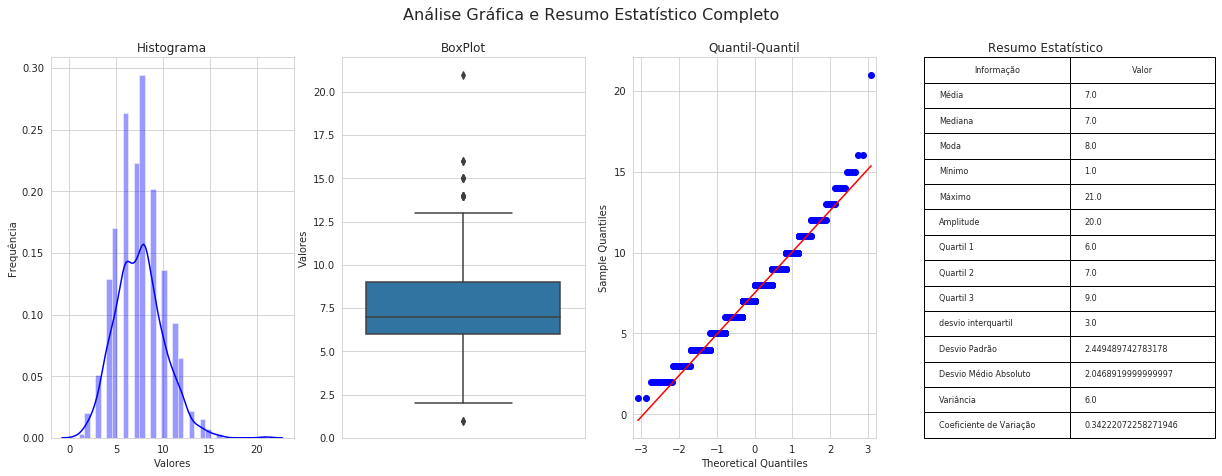

In [91]:
# Definicação do Estilo de plano de fundo (grid) para os Gráficos
sns.set_style("whitegrid")

# dist receberá a distribuição da qual se deseja extrair os dados
dist = dist_bin
df_dist = resumo_estatistico(dist)

# Cria a Estrutura para plotagem dos gráficos (n_lin x n_col) 
# A Estrutura somente tem de ser criada quando se deseja plotar mais de um gráfico simultâneo
fig, pos = plt.subplots(1, 4, figsize = (20, 7))

# Definição do título
fig.suptitle('Análise Gráfica e Resumo Estatístico Completo', fontsize = 16)

# Histograma
# Definição de Subtítulos e nome dos Eixos
pos[0].set_title("Histograma")
pos[0].set_xlabel("Valores")
pos[0].set_ylabel("Frequência")
sns.distplot(dist, color = 'blue', ax = pos[0])

# BoxPlot
pos[1].set_title("BoxPlot")
pos[1].set_ylabel("Valores")
sns.boxplot(dist,  orient = 'v', ax = pos[1])

# Gráfico Quantil-Quantil
pos[2].set_title("Quantil-Quantil")
qq.qqplot(dist, line = 'r', ax = pos[2])

#Resumo Estatístico
pos[3].set_title("Resumo Estatístico")
pos[3].axis('off')
pos[3].table(cellText = df_dist.values, cellLoc = 'left', colLabels = df_dist.columns, loc='center', colWidths=[0.5, 0.5], bbox = [0, 0, 1.2, 1]);

####**3.4. Simulação com uma Amostra (Teorema do Limite Central):**

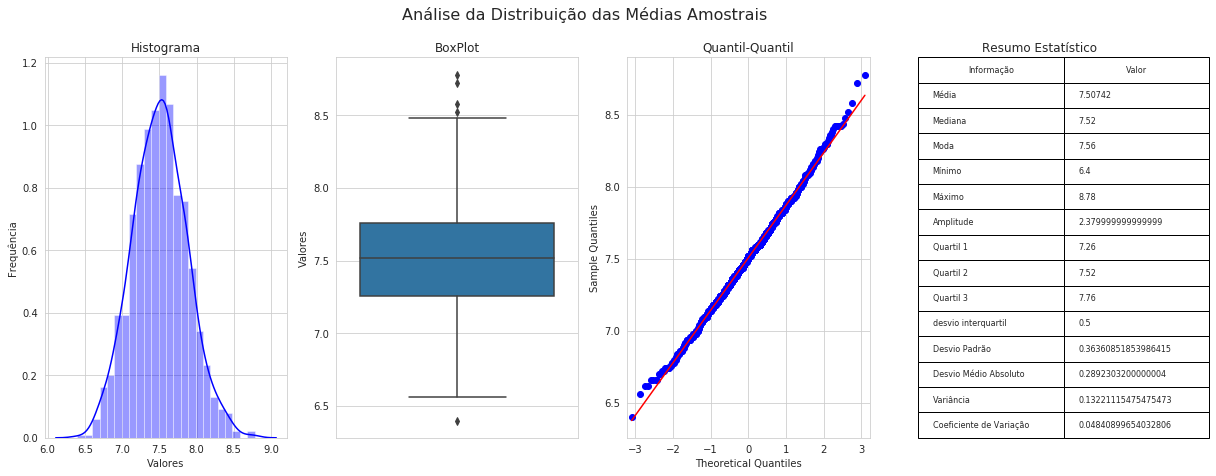

In [90]:
# Definicação do Estilo de plano de fundo (grid) para os Gráficos
sns.set_style("whitegrid")

# dist receberá uma amostra gerada a partir da distribuição escolhida
# sendo passado para a função np.random.choice() a distribuição e o tamanho da amostra
i = 0
tam = range(0, 1000)
# Armazenará as médias de 1000 amostras (n = tamanho da distribuição original)
# As amostras serão de tamanho = tam, geradas aleatoriamente a partir da distribuição original
med_amostras = []
for i in tam:
  aux = np.random.choice(dist_bin, 50) # Geração da amostra 
  aux = np.mean(aux) # Cálculo da média da amostra
  med_amostras.append(aux) # Adição a lista de médias
  i = i + 1

dist_med_amostras = np.array(med_amostras)
df_dist = resumo_estatistico(dist_med_amostras)

# Cria a Estrutura para plotagem dos gráficos (n_lin x n_col) 
# A Estrutura somente tem de ser criada quando se deseja plotar mais de um gráfico simultâneo
fig, pos = plt.subplots(1, 4, figsize = (20, 7))

# Definição do título
fig.suptitle('Análise da Distribuição das Médias Amostrais', fontsize = 16)

# Histograma
# Definição de Subtítulos e nome dos Eixos
pos[0].set_title("Histograma")
pos[0].set_xlabel("Valores")
pos[0].set_ylabel("Frequência")
sns.distplot(dist_med_amostras, color = 'blue', ax = pos[0])

# BoxPlot
pos[1].set_title("BoxPlot")
pos[1].set_ylabel("Valores")
sns.boxplot(dist_med_amostras,  orient = 'v', ax = pos[1])

# Gráfico Quantil-Quantil
pos[2].set_title("Quantil-Quantil")
qq.qqplot(dist_med_amostras, line = 'r', ax = pos[2])

#Resumo Estatístico
pos[3].set_title("Resumo Estatístico")
pos[3].axis('off')
pos[3].table(cellText = df_dist.values, cellLoc = 'left', colLabels = df_dist.columns, loc='center', colWidths=[0.5, 0.5], bbox = [0, 0, 1.2, 1]);

####**3.5. Tabela de Frequências (Distribuições Contínuas) + Gráfico:**

Número de Intervalos:	 31 
Amplitude de Classe(h):	 0.025762065757270768 



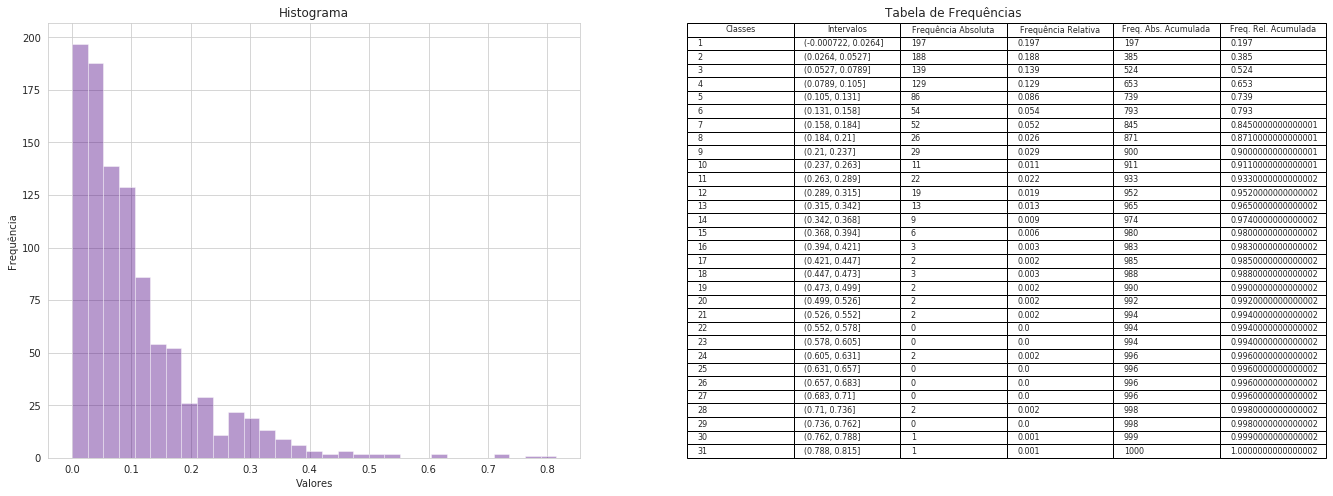

In [89]:
# Obtenção dos Dados Estatísticos
# OBS.: Esta sequência não funciona para a Distribuição Binomial, dado que a mesma é Discreta
dist = dist_exp
resumo = resumo_estatistico(dist)

# Obtenção da Tabela de Frequência + Número de intervalos + Amplitude de Classe
tab_freq, n_intervalos, h  = tabela_frequencia(dist, resumo)

# Informações complementares
print("Número de Intervalos:\t", n_intervalos,"\nAmplitude de Classe(h):\t", h, "\n")

# Estrutura de Plotagem
fig, axis = plt.subplots(1, 2, figsize = (21, 8))

# Plotagem dos Gráficos de Barra (sns.barplot)
axis[0].set_title("Histograma")
axis[0].set_xlabel("Valores")
axis[0].set_ylabel("Frequência")
sns.distplot(dist_exp, bins = n_intervalos, kde = False, ax = axis[0], color = "indigo")

# Plotagem da Tabela de Frequências
axis[1].set_title("Tabela de Frequências")
axis[1].axis('off')
axis[1].table(cellText = tab_freq.values, cellLoc = 'left', colLabels = tab_freq.columns, loc='center', colWidths=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2], bbox = [0, 0, 1.2, 1]); 


####**3.6. Tabela de Frequências (Distribuição Discreta) + Gráfico:**

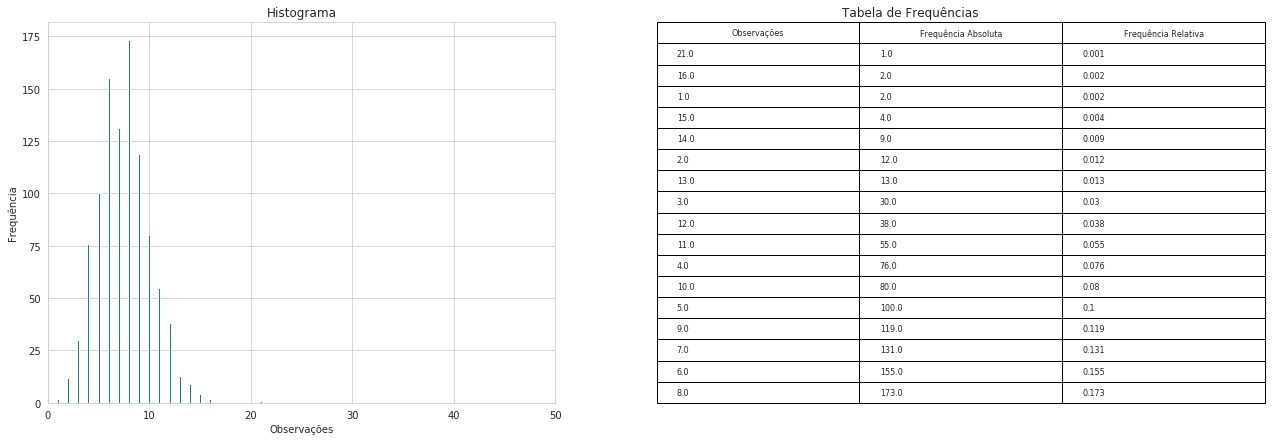

In [159]:
# Distribuição Discreta
dist = dist_bin
freq_abs_dis = pd.value_counts(dist_bin, ascending = True)
freq_rel_dis = pd.value_counts(dist_bin, ascending = True, normalize = True)

# Dicionário da Tabela de Frequências
dic_tab_discreta = {"Observações":freq_abs_dis.index,
                "Frequência Absoluta": freq_abs_dis,
                "Frequência Relativa": freq_rel_dis}

# DataFrame da Tabela de Frequências
df_tab_dis = pd.DataFrame(dic_tab_discreta)

# Estrutura para plotagem dos gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Plotagem do Histograma
axis[0].set_title('Histograma')
axis[0].set_xlabel('Observações')
axis[0].set_ylabel('Frequência')
axis[0].set_xlim([0, 50])
axis[0].bar(freq_abs_dis.index, freq_abs_dis, width = 0.2, align = 'center' )

# Plotagem da Tabela 
axis[1].set_title("Tabela de Frequências")
axis[1].axis('off')
axis[1].table(cellText = df_tab_dis.values, cellLoc = 'left', colLabels = df_tab_dis.columns, loc='center', colWidths=[0.2, 0.2, 0.2], bbox = [0, 0, 1.2, 1]);

##**4. Análise Bivariada:**

####**4.1. Descrição de duas Variáveis Simples:**

In [160]:
# Criação Manual de Dados sem Contexto Prévio
data1 = [10, 7, 67, 63, 45, 42, 34, 39, 25, 21, 18, 16, 60, 2, 52, 58, 29, 9, 3, 56]
data2 = [5, 3, 65, 34, 54, 24, 43, 93, 52, 12, 81, 62, 6, 20, 25, 75, 92, 35, 13, 29]

###Resumo Estatístico
# Cálculo de Correlação a partir da Biblioteca NumPy.corrcoef
# Entrada: Matriz N-Dimensional
correlacao = np.corrcoef(data1, data2)

# Cálculo de Covariância a partir da Biblioteca NumPy.cov
# Os dados podem ser concatenados em uma única matriz, onde cada linha é uma variável
# E cada coluna uma observação de cada variável
data = np.array([data1, data2])
covariancia = np.cov(data)

# Outra opção é a passagem de duas matrizes separadas Uni-Dimensionais
cov = np.cov(data1, data2)

print("- Matriz de Correlação gerada a partir da Biblioteca NumPy.corrcoef: \n", correlacao)
print("\n- Matriz de Covariância gerada a partir da Biblioteca NumPy.cov: \n", covariancia)

- Matriz de Correlação gerada a partir da Biblioteca NumPy.corrcoef: 
 [[1.         0.23270192]
 [0.23270192 1.        ]]

- Matriz de Covariância gerada a partir da Biblioteca NumPy.cov: 
 [[470.58947368 147.29473684]
 [147.29473684 851.39736842]]


####**4.2. Base de Dados (*Tips*):**

In [171]:
# Importação da base de dados "Tips"
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#####**4.2.1. Matriz de Covariância (Bill x Tip x Size):**

In [163]:
# Matriz de Covariância entre 'total_bill' , 'tip' e 'size'
t1 = tips['total_bill']
t2 = tips['tip']
t3 = tips['size']
data = np.array([t1, t2, t3])
cov_tips = np.cov(data)
df_cov = pd.DataFrame(cov_tips, index = ['total_bill', 'tip', 'size'], columns = ['total_bill', 'tip', 'size'])
print("- Matriz de Covariância entre as variáveis Quantitativas da Base de Dados:")
df_cov

- Matriz de Covariância entre as variáveis Quantitativas da Base de Dados:


,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


#####**4.2.2. Matriz de Correlação (Bill x Tip x Size):**

In [165]:
# Matriz de Correlação entre 'total_bill' , 'tip' e 'size'
corr_tips = np.corrcoef(data)
df_corr = pd.DataFrame(corr_tips, index = ['total_bill', 'tip', 'size'], columns = ['total_bill', 'tip', 'size'])
print("\n- Matriz de Correlação entre as variáveis Quantitativas da Base de Dados:")
df_corr


- Matriz de Correlação entre as variáveis Quantitativas da Base de Dados:


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#####**4.2.3. Tabela de Cruzamento dos Dados (Bill x Tip):**

In [167]:
# Exemplo de Tabela de Cruzamento
t1_int = pd.cut(t1, 4)
t2_int = pd.cut(t2, 4)
tab_cruz = pd.crosstab(t1_int, t2_int)
print("- Exemplo de Tabela de Cruzamento (Conta x Gorjeta):")
tab_cruz

- Exemplo de Tabela de Cruzamento (Conta x Gorjeta):


tip,"(0.991, 3.25]","(3.25, 5.5]","(5.5, 7.75]","(7.75, 10.0]"
total_bill,,,,
"(3.022, 15.005]",75,5,0,0
"(15.005, 26.94]",73,43,3,0
"(26.94, 38.875]",13,16,5,0
"(38.875, 50.81]",2,5,2,2


#####**4.2.4. Tabela Pivot (Sex x Smoker):**

In [0]:
# Exemplo de Tabela Pivot (pivot_table)
print("\n- Exemplo de Tabela Pivot (Sex & Smoker): \n")
tips.pivot_table(values = 'tip', index = ['sex', 'smoker', 'time'], aggfunc = 'count', margins = True)

####**4.3. Análise Gráfica (*Tips***):

#####**4.3.1. BarPlot (Bill x Tip):** 

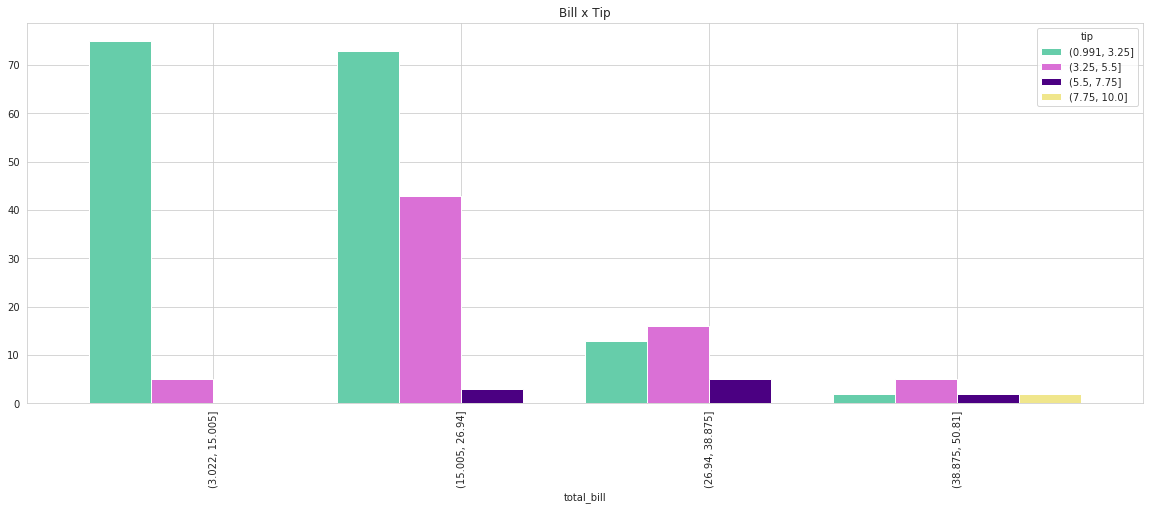

In [176]:
# Estrutura para plotagem do BarPlot (Opcional)
fig, axis = plt.subplots(1, 1, figsize = (20, 7))

# Gráfico de Barras - Matplotlib + Pandas
tab_cruz.plot(kind='bar', width = 1.0, color=['mediumaquamarine','orchid','indigo','khaki'], title='Bill x Tip' , ax = axis);

#####**4.3.2. HeatMap**:

######**4.3.2.1. HeatMap - Correlação (Bill x Tip x Size):**

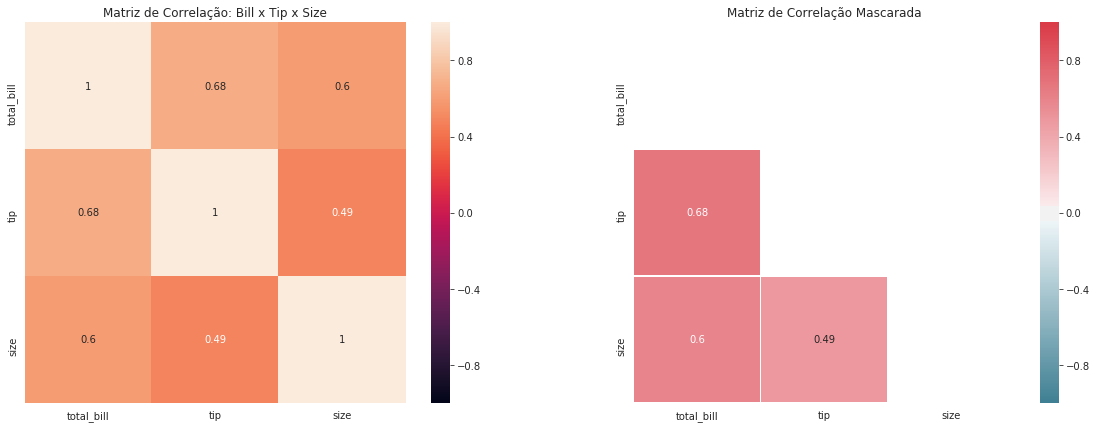

In [191]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Gerando uma nova paleta de cores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# HeatMap da Matriz de Correlação
axis[0].set_title("Matriz de Correlação: Bill x Tip x Size")
sns.heatmap(df_corr, annot = True, ax = axis[0], vmin = -1, vmax = 1, square = True);

# Máscara para a matriz triangular superior
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# HeatMap sem a triangular superior
axis[1].set_title("Matriz de Correlação Mascarada")
sns.heatmap(df_corr, mask = mask, annot = True, cmap = cmap, vmin = -1, vmax= 1, center = 0, square = True, linewidths = 0.25, ax = axis[1]);

######**4.3.2.2. HeatMap Correlação (Completo)**:

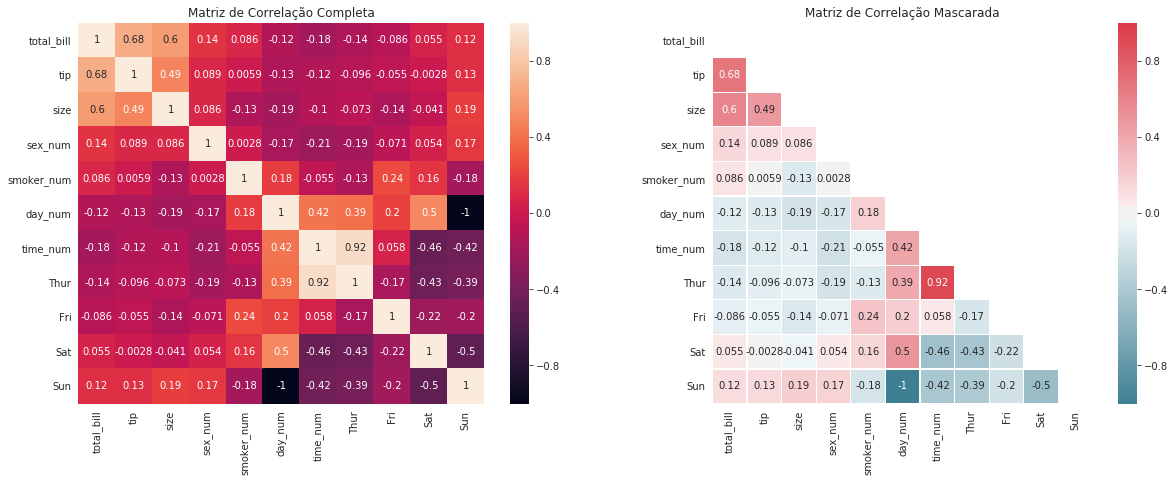

In [190]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Obtenção do DataFrame com os dados númericos da base de dados Tips:
df_tips_num = tips_numerico(tips)

# Cálculo de Correlação a partir da Biblioteca Pandas.DataFrame.corr()
axis[0].set_title("Matriz de Correlação Completa")
sns.heatmap(df_tips_num.corr(), annot = True, ax = axis[0] , vmin = -1, vmax = 1);

# Máscara para a matriz triangular superior
mask = np.triu(np.ones_like(df_tips_num.corr(), dtype=np.bool))

# HeatMap sem a matriz triangular superior
axis[1].set_title("Matriz de Correlação Mascarada")
sns.heatmap(df_tips_num.corr(), mask = mask, annot = True, cmap = cmap, vmin = -1, vmax= 1, center = 0, square = True, linewidths = 0.25, ax = axis[1]);

######**4.3.2.3. HeatMap - Covariância (Bill x Tip x Size):**

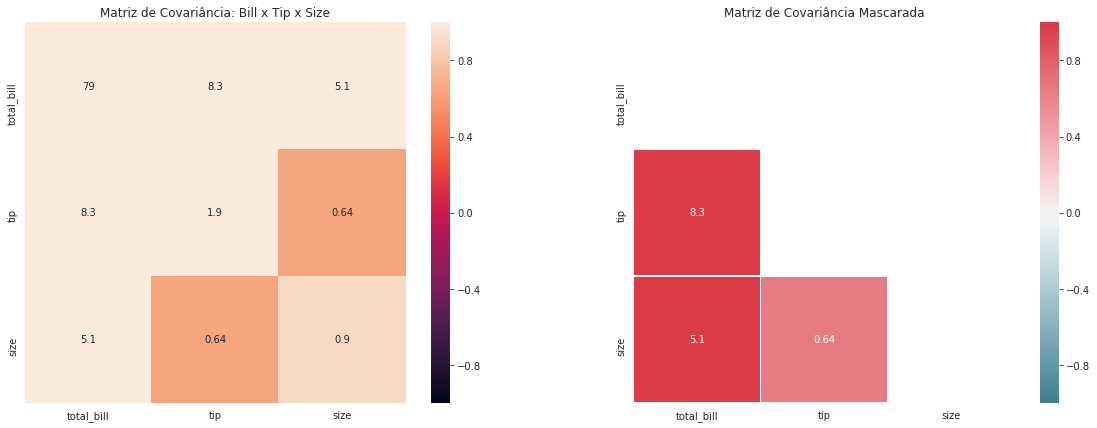

In [192]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Gerando uma nova paleta de cores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# HeatMap da Matriz de Covariância
axis[0].set_title("Matriz de Covariância: Bill x Tip x Size")
sns.heatmap(df_cov, annot = True, ax = axis[0], vmin = -1, vmax = 1, square = True);

# Máscara para a matriz triangular superior
mask = np.triu(np.ones_like(df_cov, dtype=np.bool))

# HeatMap sem a triangular superior
axis[1].set_title("Matriz de Covariância Mascarada")
sns.heatmap(df_cov, mask = mask, annot = True, cmap = cmap, vmin = -1, vmax= 1, center = 0, square = True, linewidths = 0.25, ax = axis[1]);

######**4.3.2.1. HeatMap - Covariância (Completo):**

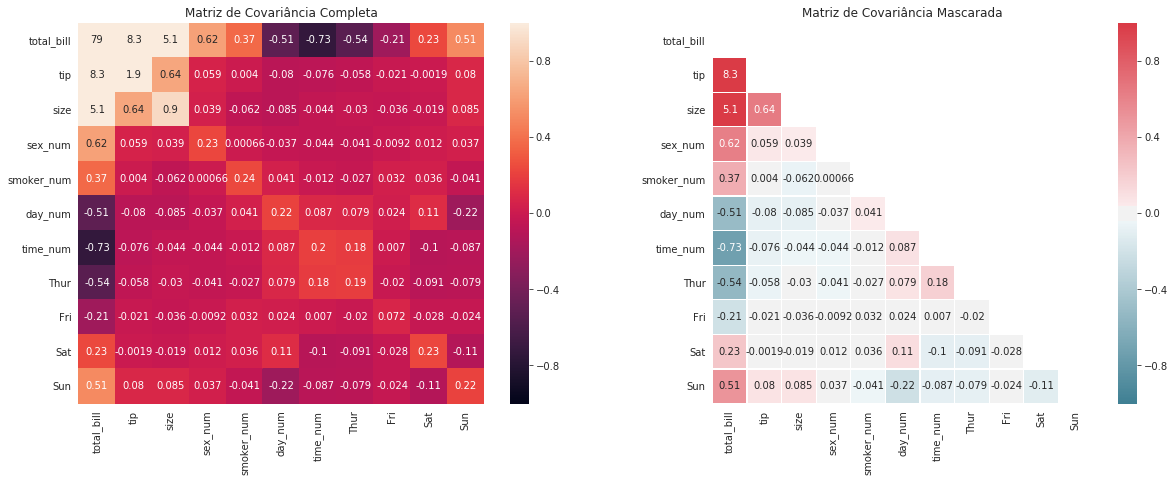

In [194]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Obtenção do DataFrame com os dados númericos da base de dados Tips:
df_tips_num = tips_numerico(tips)

# Cálculo da Covariância a partir da Biblioteca Pandas.DataFrame.cov()
axis[0].set_title("Matriz de Covariância Completa")
sns.heatmap(df_tips_num.cov(), annot = True, ax = axis[0] , vmin = -1, vmax = 1);

# Máscara para a matriz triangular superior
mask = np.triu(np.ones_like(df_tips_num.cov(), dtype=np.bool))

# HeatMap sem a matriz triangular superior
axis[1].set_title("Matriz de Covariância Mascarada")
sns.heatmap(df_tips_num.cov(), mask = mask, annot = True, cmap = cmap, vmin = -1, vmax= 1, center = 0, square = True, linewidths = 0.25, ax = axis[1]);

#####**4.3.4. ScatterPlot (Bill x Tip)**:

In [0]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(2, 2, figsize = (21, 7))

#ScatterPlot
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips, ax = axis[0, 0]);

#sns.lmplot(x="total_bill", y="tip", hue="time", data=tips);
sns.regplot(x="total_bill", y="tip", data=tips, ax = axis[0, 1]);
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips, ax = axis[1, 0]);
sns.scatterplot(x="total_bill", y="tip", hue="day", size="smoker", palette="Set2", data=tips, ax = axis[1,1]);